In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
# ############LOADING DATASET #########################

data_folder = "data"
dataset = "credit_test"
file_type = ".csv"

In [3]:
df = pd.read_csv(data_folder+"/"+dataset+file_type)

In [4]:
# removing unwanted features like LOanID and CustomerID
df = df.drop(df[['Loan ID', 'Customer ID']], axis=1)

In [5]:
# Drop record if it does not have at least 'n' values that are **not** NaN out of 17 columns
# finding val of 'n', we will see how many records are dropped at each threshlod val
for i in range(1, 18):
    mod_df = df.dropna(thresh=i)
    total_rows = mod_df.shape[0]
    print('With threshold value {0} the no. of records are {1}'.format(i, total_rows))

With threshold value 1 the no. of records are 10000
With threshold value 2 the no. of records are 10000
With threshold value 3 the no. of records are 10000
With threshold value 4 the no. of records are 10000
With threshold value 5 the no. of records are 10000
With threshold value 6 the no. of records are 10000
With threshold value 7 the no. of records are 10000
With threshold value 8 the no. of records are 10000
With threshold value 9 the no. of records are 10000
With threshold value 10 the no. of records are 10000
With threshold value 11 the no. of records are 10000
With threshold value 12 the no. of records are 10000
With threshold value 13 the no. of records are 9950
With threshold value 14 the no. of records are 8918
With threshold value 15 the no. of records are 7841
With threshold value 16 the no. of records are 3573
With threshold value 17 the no. of records are 0


In [6]:
# thresh12-10000, thresh=13-99999, thresh=14-99k, thresh=15-89k, thresh=16-79k, thresh=17-36.5k
df = df.dropna(thresh=16)

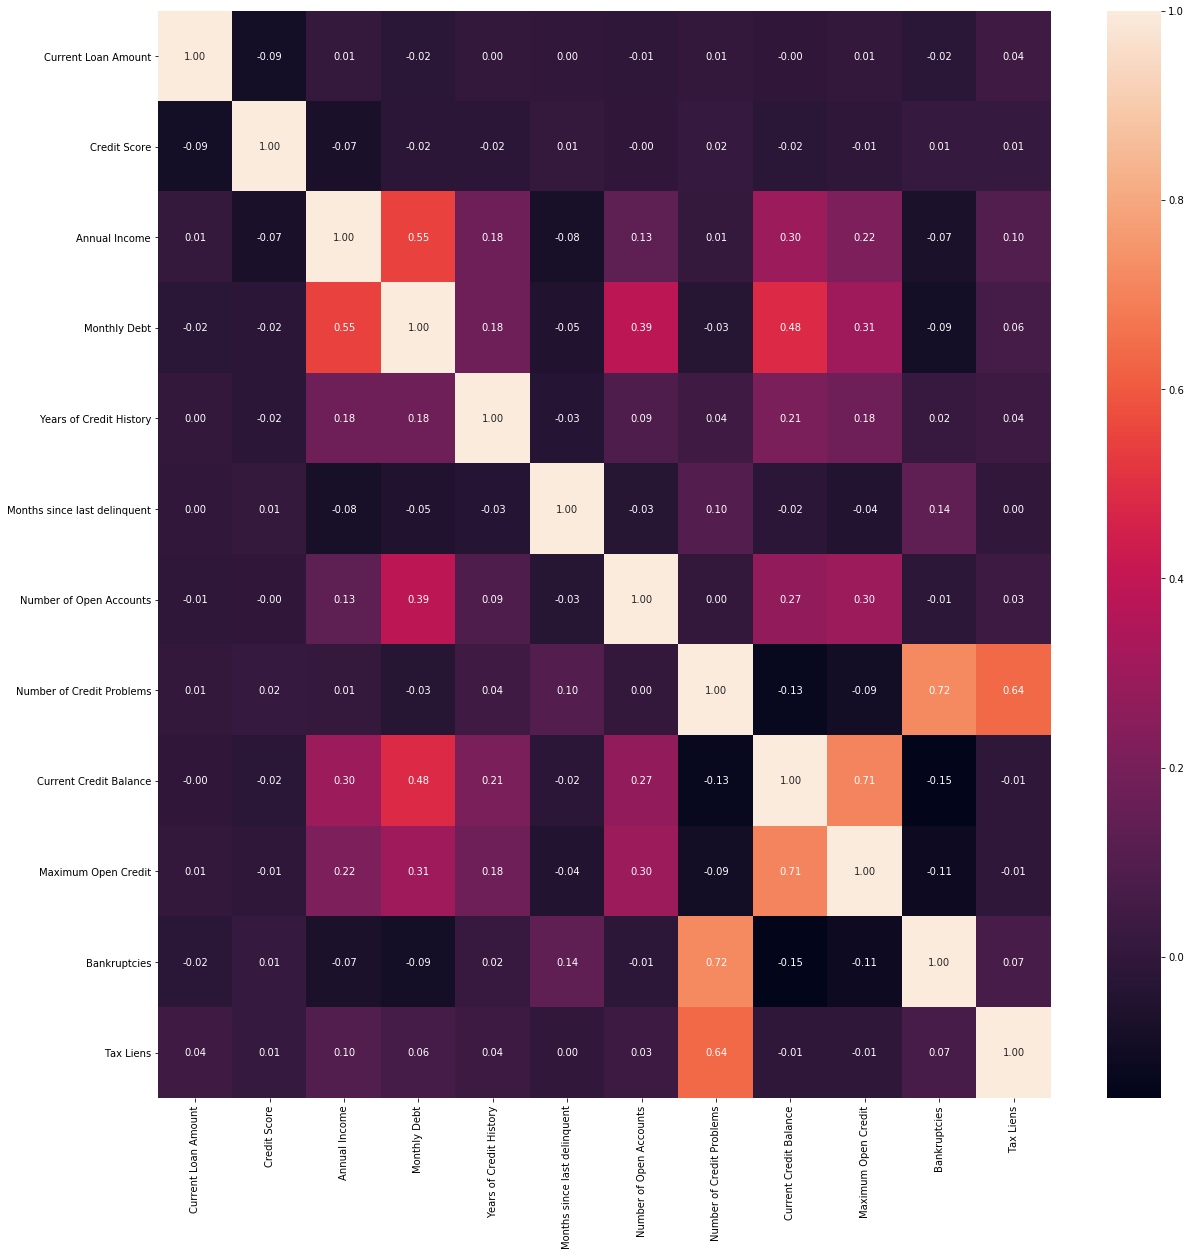

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [8]:
#removing string data from column to make it float type
mapping_dict = {'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0, '2 years':2,
       '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6, 'n/a':np.nan}
def f(x):
    try:
        return mapping_dict[x]
    except:
        return x
    
df['Years in current job'] = df['Years in current job'].apply(f).astype(np.float64)

In [9]:
#replace the unreasonable data in the credit score
def cs(i):
    if i>1000:
        i=i/10
        return(i)
    else:
        return(i)
df['Credit Score']=df['Credit Score'].apply(cs)

In [10]:
# #fill NaN values groupby more related column 
df['Credit Score'].fillna(value=df.groupby('Home Ownership')['Credit Score'].transform('median'), inplace=True)
df['Annual Income'].fillna(value=df.groupby('Purpose')['Annual Income'].transform('median'), inplace=True)
df['Years in current job'].fillna(value=df.groupby('Home Ownership')['Years in current job'].transform('median'), inplace=True)
df['Months since last delinquent'].fillna(0,inplace=True)
df['Maximum Open Credit'].fillna(value=df.groupby('Home Ownership')['Maximum Open Credit'].transform('median'),inplace=True)
df['Bankruptcies'].fillna(0,inplace=True)
df['Tax Liens'].fillna(0,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 2 to 9998
Data columns (total 16 columns):
Current Loan Amount             3573 non-null float64
Term                            3573 non-null object
Credit Score                    3573 non-null float64
Annual Income                   3573 non-null float64
Years in current job            3573 non-null float64
Home Ownership                  3573 non-null object
Purpose                         3573 non-null object
Monthly Debt                    3573 non-null float64
Years of Credit History         3573 non-null float64
Months since last delinquent    3573 non-null float64
Number of Open Accounts         3573 non-null float64
Number of Credit Problems       3573 non-null float64
Current Credit Balance          3573 non-null float64
Maximum Open Credit             3573 non-null float64
Bankruptcies                    3573 non-null float64
Tax Liens                       3573 non-null float64
dtypes: float64(13), object(3)
m

In [11]:
# #################################### Checking no. of Loan payers / non-payers #############

df.head(20)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,153494.0,Short Term,709.0,871112.0,2.0,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,Short Term,727.0,780083.0,10.0,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,Short Term,744.0,1761148.0,10.0,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
9,266288.0,Long Term,683.0,2031518.0,2.0,Rent,Debt Consolidation,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,2.0,0.0
11,258104.0,Short Term,723.0,1284514.0,7.0,Rent,Debt Consolidation,6368.99,14.6,64.0,12.0,0.0,128402.0,266904.0,0.0,0.0
17,218834.0,Short Term,742.0,1077262.0,3.0,Own Home,Home Improvements,19390.64,24.5,29.0,37.0,0.0,212800.0,502876.0,0.0,0.0
18,99999999.0,Short Term,715.0,442339.0,0.0,Rent,Debt Consolidation,14007.18,17.0,25.0,14.0,0.0,65474.0,284966.0,0.0,0.0
19,99999999.0,Long Term,715.0,694526.0,8.0,Rent,Debt Consolidation,4358.22,17.3,47.0,5.0,0.0,137332.0,272734.0,0.0,0.0
20,346610.0,Short Term,744.0,2245116.0,2.0,Home Mortgage,Debt Consolidation,24134.94,17.6,68.0,14.0,0.0,729695.0,1307922.0,0.0,0.0
23,334620.0,Short Term,740.0,963300.0,10.0,Home Mortgage,Debt Consolidation,16536.65,16.4,55.0,17.0,0.0,330581.0,843128.0,0.0,0.0


In [12]:
# dealing  with categorical values
df_preprocessed = df.copy()

In [13]:
# remove it from the dataframe so it only contains the features that our model should use
df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)

In [14]:
# encode the target variable into a numeric value
label_encoder1 = preprocessing.LabelEncoder()
df['Term'] = label_encoder1.fit_transform(df['Term'])

In [15]:
# encode features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 19 columns):
Home Ownership_HaveMortgage     3573 non-null float64
Home Ownership_Home Mortgage    3573 non-null float64
Home Ownership_Own Home         3573 non-null float64
Home Ownership_Rent             3573 non-null float64
Purpose_Business Loan           3573 non-null float64
Purpose_Buy House               3573 non-null float64
Purpose_Buy a Car               3573 non-null float64
Purpose_Debt Consolidation      3573 non-null float64
Purpose_Educational Expenses    3573 non-null float64
Purpose_Home Improvements       3573 non-null float64
Purpose_Medical Bills           3573 non-null float64
Purpose_Other                   3573 non-null float64
Purpose_Take a Trip             3573 non-null float64
Purpose_major_purchase          3573 non-null float64
Purpose_moving                  3573 non-null float64
Purpose_other                   3573 non-null float64
Purpose_small_business       

In [16]:
# ################### Run this cell only if you want to add One hot encoding values for columns ['Home Ownership', 'Purpose']

# encode features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 19 columns):
Home Ownership_HaveMortgage     3573 non-null float64
Home Ownership_Home Mortgage    3573 non-null float64
Home Ownership_Own Home         3573 non-null float64
Home Ownership_Rent             3573 non-null float64
Purpose_Business Loan           3573 non-null float64
Purpose_Buy House               3573 non-null float64
Purpose_Buy a Car               3573 non-null float64
Purpose_Debt Consolidation      3573 non-null float64
Purpose_Educational Expenses    3573 non-null float64
Purpose_Home Improvements       3573 non-null float64
Purpose_Medical Bills           3573 non-null float64
Purpose_Other                   3573 non-null float64
Purpose_Take a Trip             3573 non-null float64
Purpose_major_purchase          3573 non-null float64
Purpose_moving                  3573 non-null float64
Purpose_other                   3573 non-null float64
Purpose_small_business       

In [17]:
df.head(20)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,153494.0,1,709.0,871112.0,2.0,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,1,727.0,780083.0,10.0,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,1,744.0,1761148.0,10.0,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
9,266288.0,0,683.0,2031518.0,2.0,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,2.0,0.0
11,258104.0,1,723.0,1284514.0,7.0,6368.99,14.6,64.0,12.0,0.0,128402.0,266904.0,0.0,0.0
17,218834.0,1,742.0,1077262.0,3.0,19390.64,24.5,29.0,37.0,0.0,212800.0,502876.0,0.0,0.0
18,99999999.0,1,715.0,442339.0,0.0,14007.18,17.0,25.0,14.0,0.0,65474.0,284966.0,0.0,0.0
19,99999999.0,0,715.0,694526.0,8.0,4358.22,17.3,47.0,5.0,0.0,137332.0,272734.0,0.0,0.0
20,346610.0,1,744.0,2245116.0,2.0,24134.94,17.6,68.0,14.0,0.0,729695.0,1307922.0,0.0,0.0
23,334620.0,1,740.0,963300.0,10.0,16536.65,16.4,55.0,17.0,0.0,330581.0,843128.0,0.0,0.0


In [18]:
# Run this cell only if you want to add the One Hot Encoded values for ['Home Ownership', 'Purpose'] into training data
# merging categorical encoded dataframe with the main dataframe and deleting unwanted features
df_final = df.reset_index(drop=True).merge(encoded.reset_index(drop=True), left_index=True, right_index=True)

In [19]:
df_final.to_csv(data_folder+"/"+dataset+"_processed"+file_type)